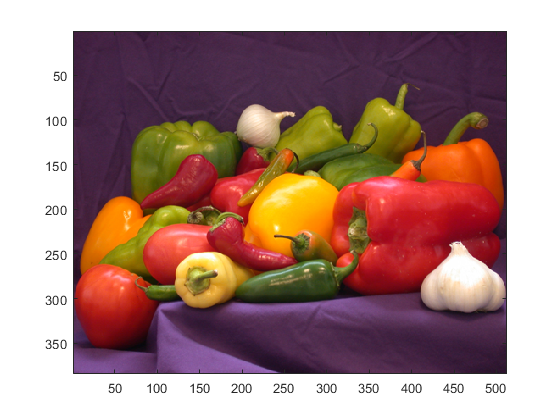

In [1]:
% Read an example image
x = imread('peppers.png') ;

% Convert to single format
x = im2single(x) ;

% Visualize the input x
figure(1) ; clf ; imagesc(x) 

> In images.internal.initSize (line 71)
  In imshow (line 332)
  In vl_imarray (line 133)
  In vl_imarraysc (line 100)



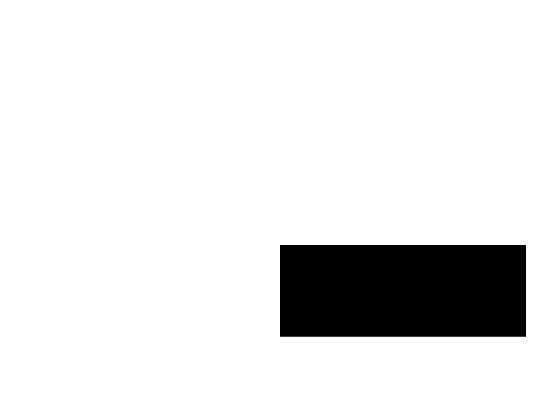

In [2]:
% Create a bank of linear filters
w = randn(5,5,3,10,'single') ;
% Apply the convolution operator
y = vl_nnconv(x, w, []) ;
% Visualize the output y
figure(2) ; clf ; vl_imarraysc(y) ; colormap gray ;

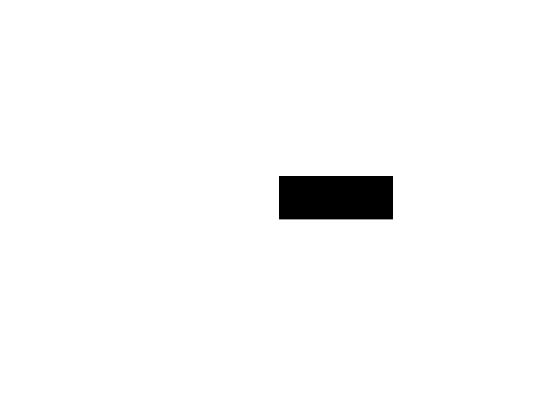

In [3]:
% Try again, downsampling the output
y_ds = vl_nnconv(x, w, [], 'stride', 16) ;
figure(3) ; clf ; vl_imarraysc(y_ds) ; colormap gray ;

> In images.internal.initSize (line 71)
  In imshow (line 332)
  In vl_imarray (line 133)
  In vl_imarraysc (line 100)



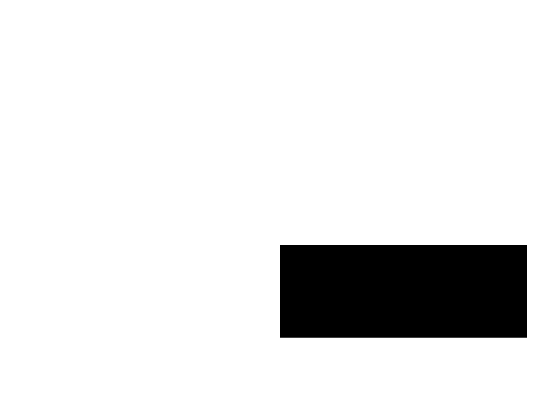

In [4]:
% Try padding
y_pad = vl_nnconv(x, w, [], 'pad', 4) ;
figure(4) ; clf ; vl_imarraysc(y_pad) ; colormap gray ;

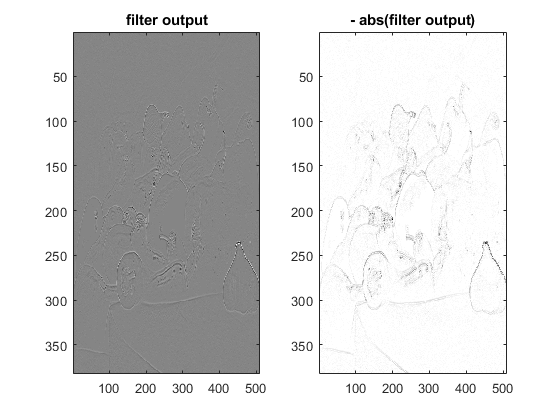

In [5]:
w = [0  1 0 ;
     1 -4 1 ;
     0  1 0 ] ;
w = single(repmat(w, [1, 1, 3])) ;
y_lap = vl_nnconv(x, w, []) ;

figure(5) ; clf ; colormap gray ;
subplot(1,2,1) ; 
imagesc(y_lap) ; title('filter output') ;
subplot(1,2,2) ;
imagesc(-abs(y_lap)) ; title('- abs(filter output)') ;

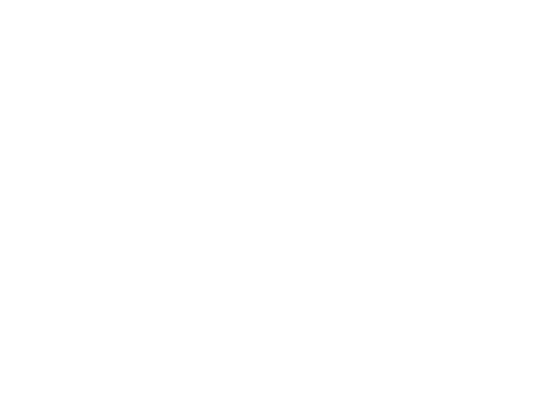

In [6]:
w = single(repmat([1 0 -1], [1, 1, 3])) ;
w = cat(4, w, -w) ;
y = vl_nnconv(x, w, []) ;
z = vl_nnrelu(y) ;

figure(6) ; clf ; colormap gray ;
subplot(1,2,1) ; vl_imarraysc(y) ;
subplot(1,2,2) ; vl_imarraysc(z) ;

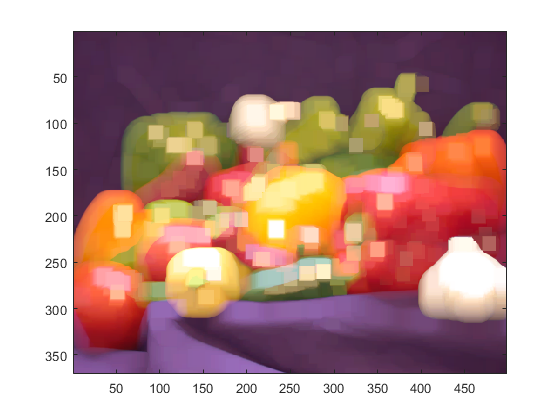

In [7]:
y = vl_nnpool(x, 15) ;
figure(6) ; clf ; imagesc(y) ;

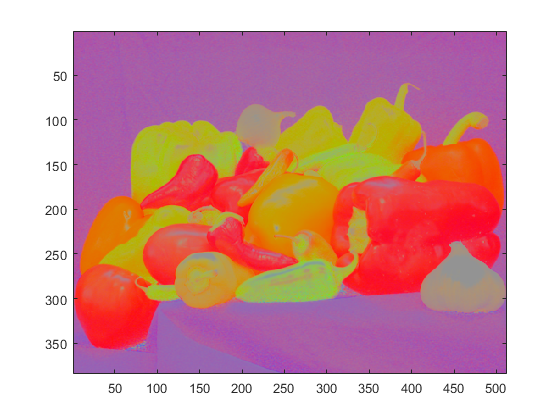

In [8]:
rho = 5 ;
kappa = 0 ;
alpha = 1 ;
beta = 0.5 ;
y_nrm = vl_nnnormalize(x, [rho kappa alpha beta]) ;
figure(6) ; clf ; imagesc(y_nrm) ;

In [10]:
% Read an example image
x = im2single(imread('peppers.png')) ;

% Create a bank of linear filters and apply them to the image
w = randn(5,5,3,10,'single') ;
y = vl_nnconv(x, w, []) ;

% Create the derivative dz/dy
dzdy = randn(size(y), 'single') ;

% Back-propagation
[dzdx, dzdw] = vl_nnconv(x, w, [], dzdy) ;

In [11]:
% Check the derivative numerically
ex = randn(size(x), 'single') ;
eta = 0.0001 ;
xp = x + eta * ex  ;
yp = vl_nnconv(xp, w, []) ;

dzdx_empirical = sum(dzdy(:) .* (yp(:) - y(:)) / eta) ;
dzdx_computed = sum(dzdx(:) .* ex(:)) ;

fprintf(...
  'der: empirical: %f, computed: %f, error: %.2f %%\n', ...
  dzdx_empirical, dzdx_computed, ...
  abs(1 - dzdx_empirical/dzdx_computed)*100) ;

der: empirical: -19007.496094, computed: -19013.666016, error: 0.03 %



In [12]:
% Parameters of the CNN
w1 = randn(5,5,3,10,'single') ;
rho2 = 10 ;

% Run the CNN forward
x1 = im2single(imread('peppers.png')) ;
x2 = vl_nnconv(x1, w1, []) ;
x3 = vl_nnpool(x2, rho2) ;

% Create the derivative dz/dx3
dzdx3 = randn(size(x3), 'single') ;

% Run the CNN backward
dzdx2 = vl_nnpool(x2, rho2, dzdx3) ;
[dzdx1, dzdw1] = vl_nnconv(x1, w1, [], dzdx2) ;

In [13]:
% Check the derivative numerically
ew1 = randn(size(w1), 'single') ;
eta = 0.0001 ;
w1p = w1 + eta * ew1  ;

x1p = x1 ;
x2p = vl_nnconv(x1p, w1p, []) ;
x3p = vl_nnpool(x2p, rho2) ;

dzdw1_empirical = sum(dzdx3(:) .* (x3p(:) - x3(:)) / eta) ;
dzdw1_computed = sum(dzdw1(:) .* ew1(:)) ;

fprintf(...
  'der: empirical: %f, computed: %f, error: %.2f %%\n', ...
  dzdw1_empirical, dzdw1_computed, ...
  abs(1 - dzdw1_empirical/dzdw1_computed)*100) ;

der: empirical: -56.984131, computed: -77.098389, error: 26.09 %

